In [1]:
import h3
lat, lng = 37.769377, -122.388903
resolution = 9
h3.latlng_to_cell(lat, lng, resolution)

'89283082e73ffff'

In [2]:
h3.versions()


{'c': '4.1.0', 'python': '4.1.2'}

**Cell counts at different resolutions**

In [3]:
from tabulate import tabulate

def num_pentagons(res):
    return 12

def num_hexagons(res):
    'Number of *hexagons* (excluding pentagons) at a resolution'
    return h3.get_num_cells(res) - 12

def num_cells(res):
    'Number of *hexagons* (excluding pentagons) at a resolution'
    return h3.get_num_cells(res)  # function name to be fixed in 4.0 release

def fmt(num):
    s = '{:,.0f}'
    return s.format(num)  


counts = [
    (res, num_cells(res), num_hexagons(res), num_pentagons(res))
    for res in range(16)
]

counts = [
    tuple(map(fmt, row))
    for row in counts
]
counts

[('0', '122', '110', '12'),
 ('1', '842', '830', '12'),
 ('2', '5,882', '5,870', '12'),
 ('3', '41,162', '41,150', '12'),
 ('4', '288,122', '288,110', '12'),
 ('5', '2,016,842', '2,016,830', '12'),
 ('6', '14,117,882', '14,117,870', '12'),
 ('7', '98,825,162', '98,825,150', '12'),
 ('8', '691,776,122', '691,776,110', '12'),
 ('9', '4,842,432,842', '4,842,432,830', '12'),
 ('10', '33,897,029,882', '33,897,029,870', '12'),
 ('11', '237,279,209,162', '237,279,209,150', '12'),
 ('12', '1,660,954,464,122', '1,660,954,464,110', '12'),
 ('13', '11,626,681,248,842', '11,626,681,248,830', '12'),
 ('14', '81,386,768,741,882', '81,386,768,741,870', '12'),
 ('15', '569,707,381,193,162', '569,707,381,193,150', '12')]

In [4]:
headers = [
    'Res',
    'Total number of cells',
    'Number of hexagons',
    'Number of pentagons',
]
out = tabulate(counts, headers=headers, tablefmt='pipe', stralign='right')

print(out)

|   Res |   Total number of cells |   Number of hexagons |   Number of pentagons |
|------:|------------------------:|---------------------:|----------------------:|
|     0 |                     122 |                  110 |                    12 |
|     1 |                     842 |                  830 |                    12 |
|     2 |                   5,882 |                5,870 |                    12 |
|     3 |                  41,162 |               41,150 |                    12 |
|     4 |                 288,122 |              288,110 |                    12 |
|     5 |               2,016,842 |            2,016,830 |                    12 |
|     6 |              14,117,882 |           14,117,870 |                    12 |
|     7 |              98,825,162 |           98,825,150 |                    12 |
|     8 |             691,776,122 |          691,776,110 |                    12 |
|     9 |           4,842,432,842 |        4,842,432,830 |                    12 |
|   

In [5]:
from IPython.display import Markdown
Markdown(out)

|   Res |   Total number of cells |   Number of hexagons |   Number of pentagons |
|------:|------------------------:|---------------------:|----------------------:|
|     0 |                     122 |                  110 |                    12 |
|     1 |                     842 |                  830 |                    12 |
|     2 |                   5,882 |                5,870 |                    12 |
|     3 |                  41,162 |               41,150 |                    12 |
|     4 |                 288,122 |              288,110 |                    12 |
|     5 |               2,016,842 |            2,016,830 |                    12 |
|     6 |              14,117,882 |           14,117,870 |                    12 |
|     7 |              98,825,162 |           98,825,150 |                    12 |
|     8 |             691,776,122 |          691,776,110 |                    12 |
|     9 |           4,842,432,842 |        4,842,432,830 |                    12 |
|    10 |          33,897,029,882 |       33,897,029,870 |                    12 |
|    11 |         237,279,209,162 |      237,279,209,150 |                    12 |
|    12 |       1,660,954,464,122 |    1,660,954,464,110 |                    12 |
|    13 |      11,626,681,248,842 |   11,626,681,248,830 |                    12 |
|    14 |      81,386,768,741,882 |   81,386,768,741,870 |                    12 |
|    15 |     569,707,381,193,162 |  569,707,381,193,150 |                    12 |

In [6]:
from shapely.geometry import Point
import geopandas as gpd
import numpy as np
import random
import swifter

# Define the range for ELAPSETIME
start = 0
stop = 500

# Define the bounding box for Boulder, CO
minx, miny = -105.301758, 39.964069
maxx, maxy = -105.178925, 40.094555

# Generate a list of random lat-long points within the bounding box
points = [Point(random.uniform(minx, maxx), random.uniform(miny, maxy)) for _ in np.arange(10000)]

# Create a geodataframe with the specified columns and attributes
gdf = gpd.GeoDataFrame({'ELAPSETIME': [random.randint(start, stop) for _ in np.arange(10000)],
                        'geometry': points}, crs='EPSG:4326')

gdf.explore(color='orangered', tiles='CartoDB positron')

In [7]:
# x = longitude, y = latitude!!!
res = 7
col = f"H3_{res}"
gdf[col] = gdf.swifter.apply(lambda row: str(h3.latlng_to_cell(row.geometry.y, row.geometry.x, res)), axis=1)
h3_df = gdf.groupby(col)['ELAPSETIME'].describe().reset_index()
h3_df.info()
h3_df.head()

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   H3_7    40 non-null     object 
 1   count   40 non-null     float64
 2   mean    40 non-null     float64
 3   std     40 non-null     float64
 4   min     40 non-null     float64
 5   25%     40 non-null     float64
 6   50%     40 non-null     float64
 7   75%     40 non-null     float64
 8   max     40 non-null     float64
dtypes: float64(8), object(1)
memory usage: 2.9+ KB


H3_7  count        mean         std   min     25%    50%  \
0  872681a00ffffff  382.0  247.429319  145.414870   1.0  127.50  246.0   
1  872681a01ffffff  260.0  239.926923  135.938602   2.0  118.00  238.5   
2  872681a02ffffff  347.0  255.089337  147.245914   0.0  131.00  262.0   
3  872681a03ffffff   83.0  276.481928  138.592345  16.0  187.50  285.0   
4  872681a04ffffff  332.0  252.009036  148.853554   1.0  120.75  261.5   

      75%    max  
0  363.50  500.0  
1  345.75  499.0  
2  378.00  499.0  
3  382.50  486.0  
4  379.25  500.0

In [8]:
h3_geoms = h3_df[col].apply(lambda cell: h3.cells_to_h3shape([cell]))
h3_gdf = gpd.GeoDataFrame(data=h3_df, geometry=h3_geoms, crs=4326)
h3_gdf.explore(color='orangered', tiles='CartoDB positron')

**H3 Cells for Region**

In [9]:
import geopandas as gpd
world = gpd.read_file('data/ne_10m_admin_0_map_units')
world.info()
world[['SOVEREIGNT', 'ADMIN','GEOUNIT', 'geometry']].head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 298 entries, 0 to 297
Columns: 169 entries, featurecla to geometry
dtypes: float64(6), geometry(1), int32(24), int64(1), object(137)
memory usage: 365.6+ KB


SOVEREIGNT      ADMIN    GEOUNIT  \
0  Indonesia  Indonesia  Indonesia   
1   Malaysia   Malaysia   Malaysia   
2      Chile      Chile      Chile   
3    Bolivia    Bolivia    Bolivia   
4       Peru       Peru       Peru   

                                            geometry  
0  MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...  
1  MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...  
2  MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...  
3  POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...  
4  MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...

In [10]:
world[world.SOVEREIGNT == 'France'][['SOVEREIGNT', 'ADMIN','GEOUNIT', 'geometry']]

SOVEREIGNT                                ADMIN  \
23      France                               France   
40      France                         Saint Martin   
62      France                               France   
196     France                        New Caledonia   
206     France            Saint Pierre and Miquelon   
209     France                     French Polynesia   
210     France  French Southern and Antarctic Lands   
220     France                               France   
222     France                               France   
229     France                     Saint Barthelemy   
238     France                               France   
240     France                               France   
261     France                    Wallis and Futuna   
289     France                    Clipperton Island   

                                 GEOUNIT  \
23                         French Guiana   
40                          Saint Martin   
62                                France   
196                        New Caledonia   
206            Saint Pierre and Miquelon   
209                     French Polynesia   
210  French Southern and Antarctic Lands   
220                           Martinique   
222                           Guadeloupe   
229                     Saint Barthelemy   
238                              Reunion   
240                              Mayotte   
261                    Wallis and Futuna   
289                    Clipperton Island   

                                              geometry  
23   POLYGON ((-54.11153 2.11427, -54.13491 2.11067...  
40   POLYGON ((-63.01757 18.03339, -63.08589 18.058...  
62   MULTIPOLYGON (((2.5218 51.08754, 2.53703 51.06...  
196  MULTIPOLYGON (((163.98512 -20.04762, 163.98609...  
206  MULTIPOLYGON (((-56.15095 46.79365, -56.15648 ...  
209  MULTIPOLYGON (((-136.16576 -22.02435, -136.175...  
210  MULTIPOLYGON (((42.7518 -17.0761, 42.72438 -17...  
220  POLYGON ((-60.81041 14.46198, -60.82266 14.456...  
222  MULTIPOLYGON (((-61.194 15.93207, -61.19469 15...  
229  POLYGON ((-62.83886 17.88198, -62.85094 17.890...  
238  POLYGON ((55.78785 -21.10345, 55.80177 -21.111...  
240  MULTIPOLYGON (((45.26222 -12.76336, 45.27711 -...  
261  MULTIPOLYGON (((-178.14232 -14.24358, -178.108...  
289  POLYGON ((-109.21203 10.30268, -109.21036 10.2...

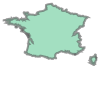

In [11]:
france = world[world.GEOUNIT == 'France'].geometry.values[0]
france

In [97]:
import contextily as cx
import matplotlib.pyplot as plt

def plot_df(df, column=None, ax=None, alpha=0.5):
    "Plot based on the `geometry` column of a GeoPandas dataframe"
    df = df.copy()
    df = df.to_crs(epsg=3857)  # web mercator

    if ax is None:
        _, ax = plt.subplots(figsize=(8,8))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    df.plot(
        ax=ax,
        alpha=alpha, edgecolor='k',
        column=column, categorical=True,
        legend=True,
        legend_kwds={'loc': 'lower right'},
    )
    cx.add_basemap(ax, crs=df.crs, source=cx.providers.CartoDB.Positron)


def plot_shape(shape, ax=None):
    df = gpd.GeoDataFrame({'geometry': [shape]}, crs='EPSG:4326')
    plot_df(df, ax=ax)


def plot_cells(cells, ax=None):
    plot_df(gpd.GeoDataFrame(geometry=[h3.cells_to_h3shape([cell]) for cell in cells], crs=4326), ax=ax, alpha=0.3)
    # shape = h3.cells_to_h3shape(cells, tight=False)
    # plot_shape(shape, ax=ax)


def plot_shape_and_cells(shape, res=9):
    fig, axs = plt.subplots(1,2, figsize=(10,5), sharex=True, sharey=True)
    plot_shape(shape, ax=axs[0])
    plot_cells(h3.geo_to_cells(shape, res), ax=axs[1])
    fig.tight_layout()

In [98]:
from shapely import buffer

distance, resolution = 0.15, 4

france_cells = h3.geo_to_cells(buffer(france, distance=distance), res=resolution)
len(france_cells)

377

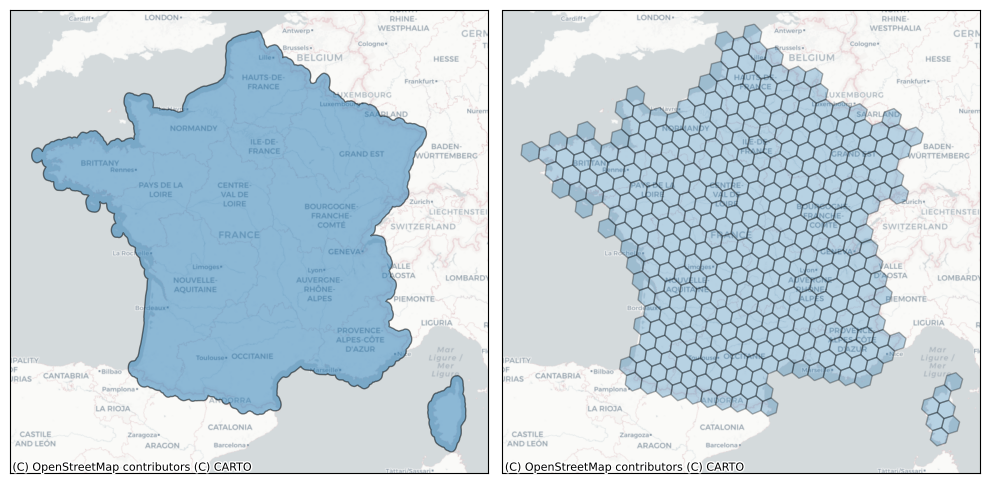

In [99]:
plot_shape_and_cells(buffer(france, distance=distance), res=resolution)

In [100]:
import quackosm as qosm

In [101]:
tags_filter = {
  'craft': ['distillery', 'winery'], 
  'landuse': 'vineyard',
  # 'shop': 'wine', 
}

wineries_by_cell = [
  # qosm.convert_pbf_to_geodataframe(
  #   pbf_path='~/Documents/data/planet-241230.osm.pbf',
  #   geometry_filter=area, tags_filter=tags_filter,
  #   keep_all_tags=True,
  #   explode_tags=True
  # )
  qosm.convert_geometry_to_geodataframe(
    geom, tags_filter=tags_filter,
    keep_all_tags=True,
    explode_tags=True,
    allow_uncovered_geometry=True,
  )
  for geom in gpd.GeoDataFrame(geometry=[h3.cells_to_h3shape([cell]) for cell in france_cells[:10]], crs=4326).geometry
]

len(wineries_by_cell)

10

In [102]:
values = list(map(lambda gdf: gdf.shape[0], wineries_by_cell))

In [103]:
geometries = h3.cells_to_h3shape(france_cells[:10], tight=False)
geometries

<LatLngMultiPoly: [22], [6], [6], [6]>

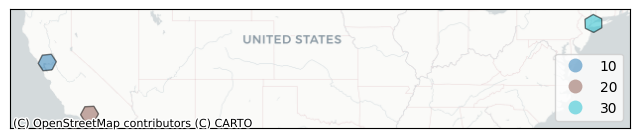

In [104]:
import h3
import pandas as pd
import plotly.graph_objects as go
from shapely import Point

# create sample data
df = pd.DataFrame(
  {
    'lat': [37.7749, 34.0522, 40.7128],
    'lon': [-122.4194, -118.2437, -74.0060],
    'value': [10, 20, 30],
  }
)

# Add H# cells
resolution = 3
df['h3_cell'] = df.apply(lambda row: h3.latlng_to_cell(row.lat, row.lon, res=resolution), axis=1)
df['geometry'] = df['h3_cell'].apply(lambda cell: h3.cells_to_geo([cell]))

# create a geopandas dataframe
# gdf = gpd.GeoDataFrame(df, geometry='geometry', crs=4326)

plot_df(gdf.to_crs(6350), column='value')